# Offshore Wind Structure - Exercise 3 (Dynamics)
The objective of this exercise is the initial dimensioning of the tower/monopile
structure (scantling). As offshore wind structures are dynamically sensitive, the
focus will be on avoiding potential resonance. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
depth = 25 #m

# Small wind Turbine - technical details
small_d            = 50           # [m]
small_rpm          = [19.5, 30.7] # max, min [rpm]
small_nacelle_mass = 80           # [ton]

# Senvion 03M152 wind turbine - technical details
sevion_d            = 152       # [m]
# sevion_rpm
sevion_nacelle_mass = 350 + 156 # [ton]

# Wave Loading
peak_frequency  = 0.2055 # [Hz]
mean_wind_speed = 8.0    # [m/s]
elevation       = 10.0   # [m]
fetch           = 60.0   # [km]

ro = 7850.0 # [kg/m3]

In [3]:
# functions to be used
def calc_DAF(beta, damping):
    return 1/np.sqrt((1-beta)**2 + (2*damping*beta)**2)

def calc_fn(nacelle_mass, r1, r2, L, ro = 7850.0, E = 1.80e11):
    
    m_t = nacelle_mass*1e3
    m_b = 3.14*(r1**2 - r2**2)*L*ro
    
    I = 3.14/4.*(r1**4 - r2**4) # 

    # print('Inertia:',I)

    # Natural Frequency
    w_n = np.sqrt(
        (3*E*I)/(L**3*(33/140*m_b + m_t)))
    f_n = 1/(2*3.14)*w_n
    
    return f_n, w_n

## Question 1
Design a tower/monopile(s) to support the wind turbines (length, diameter, thickness). Justify your choices.

In [4]:
# support of wind turbine (Small)

range_freq = np.array(small_rpm)
blade = small_d
damping = 0

# geometrical 
L = depth + blade/2 + elevation # [m]
d = 5.0    # [m]
t = 0.02 # [m]

r1 = d/2
r2 = d/2 - t

# natural frequency calculation
f_n, w_n = calc_fn(small_nacelle_mass, r1, r2, L, ro = 7850.0, E = 1.80e11)
print('The natural frequency is', f_n,'Hz\n')

f_1P = range_freq/60
f_3P = 3*range_freq/60

print('1P:', f_1P)
print('3P:', f_3P)

print('Length:', L,'m')

beta_1P = f_1P/w_n
beta_3P = f_3P/w_n

# Dynqmic Amplification Factor
DAF_1P = calc_DAF(beta_1P, damping)
DAF_3P = calc_DAF(beta_3P, damping)

print('The DAF for 1P', f_1P, 'hz are', DAF_1P)
print('The DAF for 3P', f_3P, 'hz are', DAF_3P)

no_nacelle_small = calc_fn(0, r1, r2, L, ro = 7850.0, E = 1.80e11)

The natural frequency is 0.7319319457562897 Hz

1P: [0.325      0.51166667]
3P: [0.975 1.535]
Length: 60.0 m
The DAF for 1P [0.325      0.51166667] hz are [1.0760851  1.12525911]
The DAF for 3P [0.975 1.535] hz are [1.26922303 1.50138287]


In [5]:
# support of wind turbine (BIG)

range_freq = np.array([10., 20.])
blade = sevion_d
damping = 0

L = depth + blade/2 + elevation # [m]
d = 7.0    # [m]
t = 0.025 # [m]

r1 = d/2
r2 = d/2 - t

# natural frequency calculation
f_n, w_n = calc_fn(small_nacelle_mass, r1, r2, L, ro = 7850.0, E = 1.80e11)
print('The natural frequency is', f_n,'Hz\n')

f_1P = range_freq/60
f_3P = 3*range_freq/60

print('1P:', f_1P)
print('3P:', f_3P)

print('Length:', L,'m')

beta_1P = f_1P/w_n
beta_3P = f_3P/w_n

# Dynqmic Amplification Factor
DAF_1P = calc_DAF(beta_1P, damping)
DAF_3P = calc_DAF(beta_3P, damping)

print('The DAF for 1P', f_1P, 'hz are', DAF_1P)
print('The DAF for 3P', f_3P, 'hz are', DAF_3P)

no_nacelle_sevion = calc_fn(0, r1, r2, L, ro = 7850.0, E = 1.80e11)

The natural frequency is 0.4161914235383117 Hz

1P: [0.16666667 0.33333333]
3P: [0.5 1. ]
Length: 111.0 m
The DAF for 1P [0.16666667 0.33333333] hz are [1.06811018 1.14617647]
The DAF for 3P [0.5 1. ] hz are [1.23655402 1.61970073]


## Question 2
In your opinion, the support structure will experience resonance problems during the installation stage (before the rotor nacelle assembly is installed)?

In [9]:
print('Natural frequencies without the nacelle for:')
print('  - Small :', no_nacelle_small[0] , 'Hz')
print('  - Sevion:', no_nacelle_sevion[0], 'Hz')

Natural frequencies without the nacelle for:
  - Small : 1.3304385078309404 Hz
  - Sevion: 0.5444594074679955 Hz


## Question 3
Plot a Campbell diagram for each wind turbine.

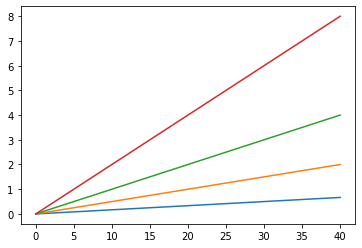

In [13]:
rpm_array = np.linspace(0,40, num=100, dtype=float)
f_1P = rpm_array/60.
f_3P = f_1P*3.
f_6P = f_3P*2.
f_12P= f_6P*2.

plt.plot(rpm_array, f_1P)
plt.plot(rpm_array, f_3P)
plt.plot(rpm_array, f_6P)
plt.plot(rpm_array, f_12P)
plt.show()